# Black Phototube

In [1]:
import numpy as np
import scipy
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import math
import matplotlib.pyplot as plt

In [2]:
h = 6.63*10**-34
c = 3*10**8
e = 1.6*10**-19
red_wavelength = 635*10**-9
green_wavelength = 532*10**-9
violet_wavelength = 405*10**-9
wavelengths = np.array([red_wavelength, green_wavelength, violet_wavelength])

In [3]:
red_current = np.linspace(25, 25, 5) * 10**-9 #A
green_current = np.array([538, 540, 540, 542, 549]) * 10**-9#A
violet_current = np.array([2530, 2537, 2537, 2550, 2544]) * 10**-9 #A

In [4]:
n_red = np.mean(red_current)/e  #electrons per second
n_green = np.mean(green_current)/e
n_violet = np.mean(violet_current)/e
n = np.array([n_red, n_green, n_violet])

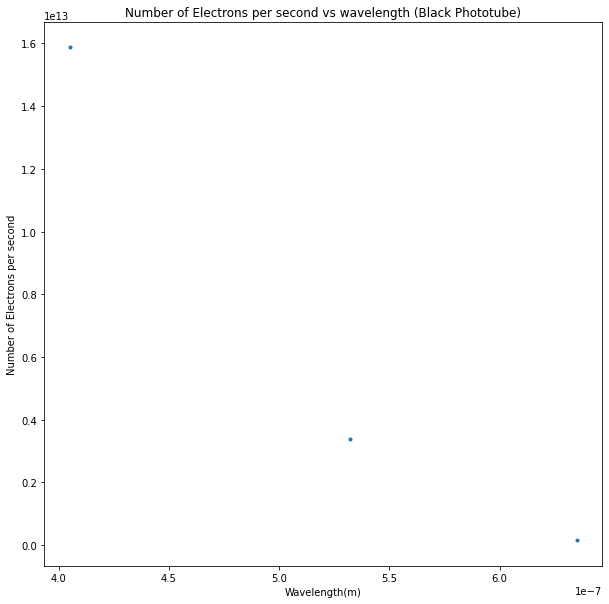

In [5]:
fig, ax = plt.subplots(figsize=(10,10))

nerrors = np.array([4, 3, 3])/e*10**-9 #A
ax.errorbar(wavelengths, n, yerr=nerrors, fmt='.')
ax.set_xlabel('Wavelength(m)')
ax.set_ylabel('Number of Electrons per second')

ax.set_title('Number of Electrons per second vs wavelength (Black Phototube)')
plt.show()

In [6]:
voltage =  3 #V
red_power = np.mean(np.array([11.1, 11.2, 11.3]) *10**-3)*voltage # W
green_power = np.mean(np.array([113, 112.2, 113]) *10**-3)*voltage # W
violet_power = np.mean(np.linspace(101,101, 101) *10**-3)*voltage # W

In [7]:
photon_energy_red = (h*c)/red_wavelength
photon_energy_green = (h*c)/green_wavelength
photon_energy_violet = (h*c)/violet_wavelength

In [8]:
npr_red = red_power/photon_energy_red #photons per second
npr_green = green_power/photon_energy_green  #photons per second
npr_violet= violet_power/photon_energy_violet #photons per second
npr = np.array([npr_red, npr_green, npr_violet])

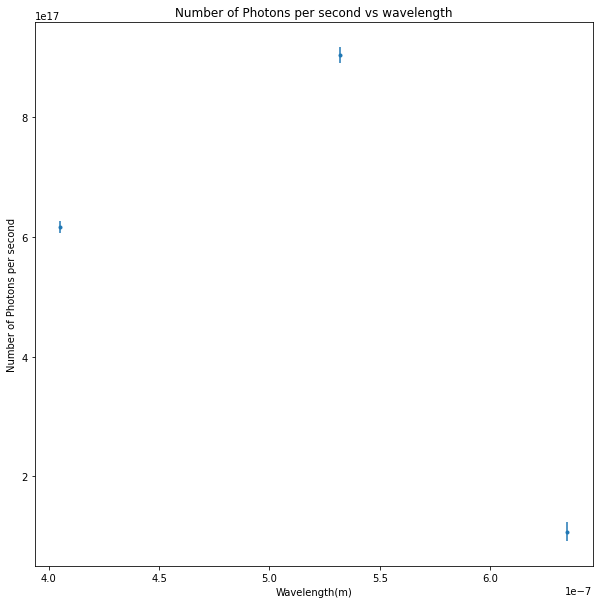

In [10]:
fig, ax = plt.subplots(figsize=(10,10))

nprerrors = np.array([1/photon_energy_red, 1/photon_energy_green, 1/photon_energy_violet])*5*10**-3
ax.errorbar(wavelengths, npr, nprerrors, fmt='.')
ax.set_xlabel('Wavelength(m)')
ax.set_ylabel('Number of Photons per second')

ax.set_title('Number of Photons per second vs wavelength')
plt.show()

In [11]:
eqe_errors = np.sqrt((1/npr*nerrors)**2+((n/npr**2)*nprerrors)**2)

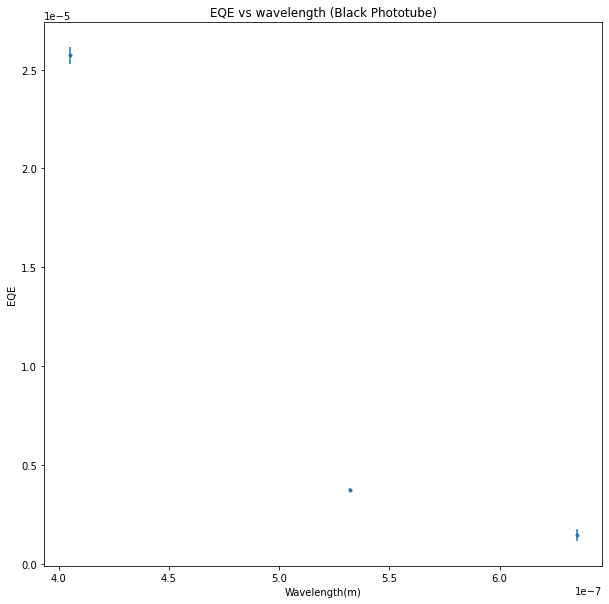

In [12]:
eqe = n/npr
fig, ax = plt.subplots(figsize=(10,10))

ax.errorbar(wavelengths, eqe, eqe_errors, fmt='.')

ax.set_xlabel('Wavelength(m)')
ax.set_ylabel('EQE')

ax.set_title('EQE vs wavelength (Black Phototube)')
plt.show()


# Grey Phototube

In [14]:
red_current = np.linspace(0.05, 0.06, 5) * 10**-6 #A 
green_current = np.array([1.13, 1.13, 1.13, 1.1, 1.14]) * 10**-6 #A
violet_current = np.array([4.31, 4.33, 4.44, 4.35, 4.32]) * 10**-6 #A
nerrors = np.array([0.01, 0.02,0.01])/e*10**-6 #A

In [15]:
red_voltage = np.array([0.352, 0.351, 0.351, 0.351, 0.352]) #V
green_voltage = np.array([10.08, 10.13, 10.12, 10.1,10.17]) #V
red_current_vm = np.linspace(35.14, 3) * 10**-9 #A
green_current_vm = np.linspace(1012, 1012, 3)* 10**-9 #A
nerrors_vm = np.array([0.002, 0.05])*10**-9

In [18]:
n_red = np.mean(red_current)/e  #electrons per second
n_green = np.mean(green_current)/e
n_violet = np.mean(violet_current)/e
n = np.array([n_red, n_green, n_violet])

In [17]:
n_red_vm = np.mean(red_current_vm)/e
n_green_vm = np.mean(green_current_vm)/e
eqe_red_vm = n_red_vm / npr_red
eqe_green_vm =  n_green_vm/npr_green
n2= np.array([eqe_red_vm, eqe_green_vm])

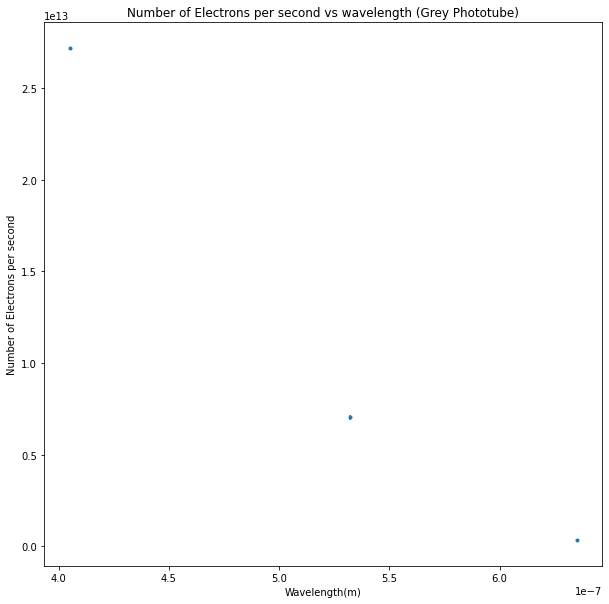

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
ax.errorbar(wavelengths, n, nerrors, fmt='.')
ax.set_xlabel('Wavelength(m)')
ax.set_ylabel('Number of Electrons per second')

ax.set_title('Number of Electrons per second vs wavelength (Grey Phototube)')
plt.show()

In [31]:
eqe_grey = n/npr
eqe_errors_g = np.sqrt((1/npr*nerrors)**2+((n/npr**2)*nprerrors)**2)


In [34]:
eqe_errors_g

array([7.52908825e-07, 1.79788842e-07, 7.34188650e-07])

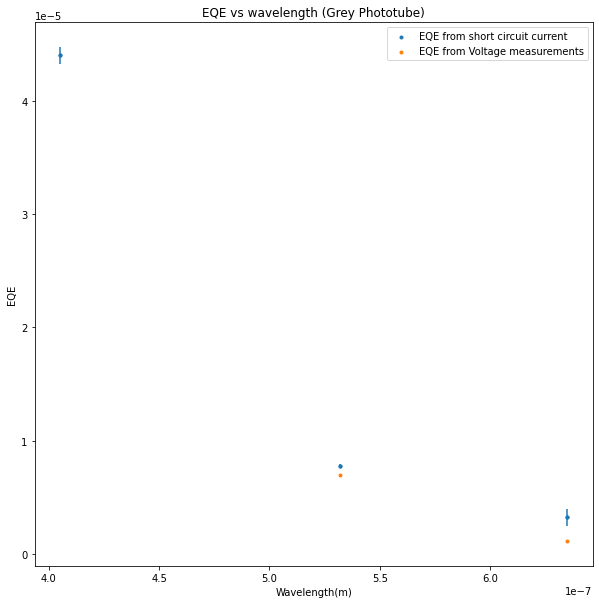

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
wavelengths_vm = np.array([red_wavelength, green_wavelength])

ax.scatter(wavelengths, eqe_grey, label = 'EQE from short circuit current', marker = '.')
ax.errorbar(wavelengths, eqe_grey, eqe_errors_g, fmt='.')
ax.scatter(wavelengths_vm, n2, label='EQE from Voltage measurements', marker = '.')
ax.set_xlabel('Wavelength(m)')
ax.set_ylabel('EQE')
ax.set_title('EQE vs wavelength (Grey Phototube)')
plt.legend(loc="upper right")
plt.show()


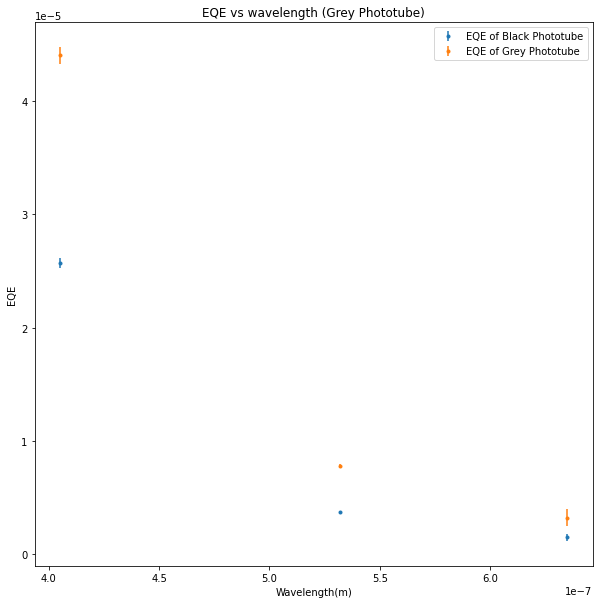

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
ax.errorbar(wavelengths, eqe, eqe_errors, fmt='.', label = 'EQE of Black Phototube')
ax.errorbar(wavelengths, eqe_grey, eqe_errors_g, fmt='.', label='EQE of Grey Phototube')
ax.set_xlabel('Wavelength(m)')
ax.set_ylabel('EQE')
ax.set_title('EQE vs wavelength (Grey Phototube)')
plt.legend(loc="upper right")
plt.show()
